In [13]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [3]:
!ls

 DataSets
'Outlier detection and removal using percentile.ipynb'
'Outlierdetectionandremoval_ Zscore_StandardDeviation.ipynb'


In [6]:
path = !pwd
path = str(path[0]) + '/DataSets/'
path

'/home/coder/Desktop/MachineLearning/FeatureEngineeringFromBasics/DataSets/'

In [7]:
df = pd.read_csv(path+'kaggleheights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


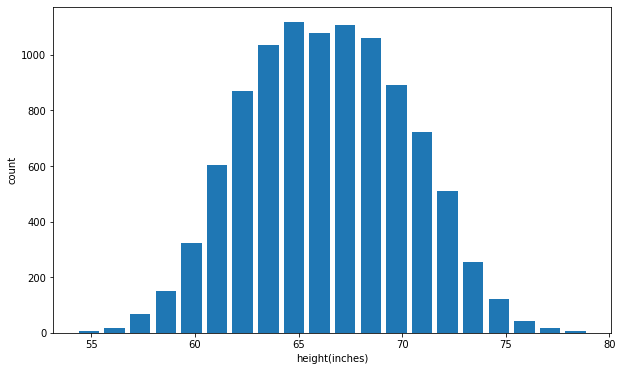

In [12]:
plt.hist(df['height'],bins=20,rwidth=0.8)
plt.ylabel('count')
plt.xlabel('height(inches)')
plt.show()

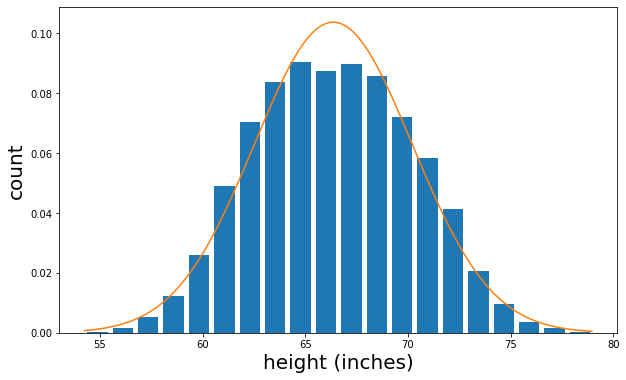

In [18]:
from scipy.stats import norm
plt.hist(df['height'],bins=20,rwidth=0.8,density=True)
plt.ylabel('count', fontsize=20)
plt.xlabel('height (inches)', fontsize=20)

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [28]:
df['height'].mean(), df['height'].std()

(66.3675597548656, 3.847528120795573)

# (1) Outlier detection and removal using 3 standard deviation

In [20]:
upper_limit = df['height'].mean() + 3*df['height'].std()
upper_limit

77.91014411725232

In [21]:
lower_limit = df['height'].mean() - 3*df['height'].std()
lower_limit

54.824975392478876

In [22]:
df[(df['height']>upper_limit) | (df['height']<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [27]:
df2 = df[(df['height']<upper_limit) & (df['height']>lower_limit)]
df2.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


# (2) Outlier detection and removal using Z Score

## Z score is a way to achieve same thing that we did above in part (1)
## Z score indicates how many standard deviation away a data point is.

In [31]:
df['zscore'] = (df['height'] - df['height'].mean())/(df['height'].std())
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [34]:
df3 = df[(df['zscore']>-3) & (df['zscore']<3)]
df3.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


# Exercise

In [39]:
df = pd.read_csv(path+'bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [41]:
min_threshold, max_threshold = df['price'].quantile([0.01,0.99])
min_threshold, max_threshold

(19.0, 660.0)

In [44]:
df1 = df[(df['price']>min_threshold) & (df['price']<max_threshold)]
df1['price'].describe()

count    12931.000000
mean       102.681898
std         89.958257
min         19.330000
25%         50.000000
50%         71.890000
75%        120.000000
max        650.000000
Name: price, dtype: float64

In [46]:
upper_limit = df1['price'].mean() + 4*df1['price'].std()
upper_limit

462.51492641224314

In [47]:
lower_limit = df1['price'].mean() - 4*df1['price'].std()
lower_limit

-257.1511308821221

In [49]:
df2 = df1[(df1['price']<upper_limit) & (df1['price']>lower_limit)]
df2.shape

(12778, 7)

In [51]:
df2['zscore'] = (df2['price'] - df2['price'].mean())/(df2['price'].std())
df2.head()

/home/coder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.770640
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,0.300234
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.467228
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.030569
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.612781


In [52]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.770640
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,0.300234
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.467228
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.030569
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.612781


In [53]:
new_df = df2[(df2['zscore']<4) & (df2['zscore']>-4)]
new_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.770640
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,0.300234
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.467228
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.030569
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.612781
